In [1]:
import glob
import numpy as np
from PIL import Image

In [2]:
base_path = "/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/zalando_final/model_images_dense/"

In [3]:
poses = glob.glob(base_path + "*")

In [4]:
images = glob.glob("/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/zalando_final/model_images/*")

In [5]:
poses[0]

'/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/zalando_final/model_images_dense/MOQ21E037-A11@8.npy'

In [6]:
images[0]

'/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/zalando_final/model_images/VM421E0ZL-K11@12.jpg'

In [7]:
data = np.load(poses[0])

In [17]:
data.shape

(3, 1927, 641)

In [16]:
np.unique(data[2])

array([  0,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
        81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 19

In [18]:
data[0].shape

(1927, 641)

In [13]:
dense = Image.fromarray(data[2])

In [24]:
dense.show()

In [20]:
img = Image.open('/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/zalando_final/model_images/MOQ21E037-A11@8.jpg')

In [23]:
img.show()

In [41]:
data.shape

(3, 1927, 641)

In [42]:
dense = np.moveaxis(data, 0, -1)

In [43]:
dense.shape

(1927, 641, 3)

In [88]:
solution = 200

In [89]:
solution_float = float(solution) - 1

In [90]:
U = dense[:,:,1]
V = dense[:,:,2]

parts = list()

In [254]:
PartInd = 24

In [255]:
actual_part = np.zeros((solution, solution, 3))
x, y = np.where(dense[:, :, 0] == PartInd)

In [256]:
U[x, y].shape

(708,)

In [257]:
u_current_points = U[x, y]
v_current_points = V[x, y]

In [258]:
tex_map_coords = ((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)

In [259]:
for c in range(3):
    actual_part[tex_map_coords[0],tex_map_coords[1], c] = np.array(img)[x,y,c]

In [266]:
part = Image.fromarray(np.moveaxis(actual_part, 2, 0))
part.show()

TypeError: Cannot handle this data type: (1, 1, 200), <f8

In [75]:
tex_map_coords[0].shape

(154950,)

In [76]:
np.unique(tex_map_coords[0])

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25])

In [ ]:
def get_texture(im,IUV,solution = 32): 
    #
    #inputs:
    #   solution is the size of generated texture, in notebook provided by facebookresearch the solution is 200
    #   If use lager solution, the texture will be sparser and smaller solution result in denser texture. 
    #   im is original image
    #   IUV is densepose result of im
    #output:
    #   TextureIm, the 24 part texture of im according to IUV
    solution_float = float(solution) - 1 

    U = IUV[:,:,1]
    V = IUV[:,:,2]
    parts = list()
    for PartInd in range(1,25):    ## Set to xrange(1,23) to ignore the face part.
        actual_part = np.zeros((solution, solution, 3))
        x,y = np.where(IUV[:,:,0]==PartInd)
        if len(x) == 0:
            parts.append(actual_part)
            continue


        u_current_points = U[x,y]   #  Pixels that belong to this specific part.
        v_current_points = V[x,y]
        ##
        tex_map_coords = ((255-v_current_points)*solution_float/255.).astype(int),(u_current_points*solution_float/255.).astype(int)
        for c in range(3):
            actual_part[tex_map_coords[0],tex_map_coords[1], c] = im[x,y,c]
        parts.append(actual_part)


        TextureIm  = np.zeros([solution*6,solution*4,3]);

        for i in range(4):
            for j in range(6):
                TextureIm[ (solution*j):(solution*j+solution)  , (solution*i):(solution*i+solution) ,: ] = parts[i*6+j]




    plt.figure(figsize = (25,25))

    plt.imshow(TextureIm.transpose([1,0,2])[:,:,::-1]/255);

### Resizing dense info

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
img = cv2.imread('normal_texture.jpg')
res = cv2.resize(img, dsize=(256, 256), interpolation=cv2.INTER_CUBIC)

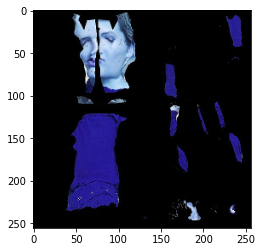

In [6]:
plt.imshow(res)

In [18]:
dense = np.load("./dense.npy")
dense = np.moveaxis(dense, 0, -1)
dense.shape

(2243, 1056, 3)

In [19]:
dense_resized = cv2.resize(dense, dsize=(256, 256), interpolation = cv2.INTER_CUBIC)

In [21]:
dense_resized.shape

(256, 256, 3)

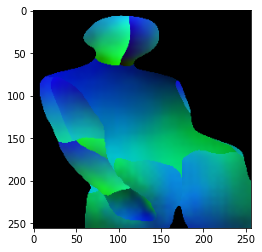

In [22]:
plt.imshow(dense_resized)

## renaming all the files of a folder

In [7]:
import glob
import os

In [4]:
path = "/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/zalando_final/model_images_atlas_texture/"

In [5]:
files = glob.glob(path + "*")

In [6]:
len(files)

6189

In [9]:
files[0].split(".")[0]

'/media/tensor/EXTDRIVE/projects/virtual-try-on/dataset/zalando_final/model_images_atlas_texture/OA221E0AM-G11@8'

In [10]:
for file in files:
    os.rename(file, file.split(".")[0] + ".jpg")